In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
#Path to CSV
charging_stations_csv = "./Public_Electric_Vehicle_Charging_Stations_and_Alternative_Fuel_Stations_in_Maryland.csv"
electric_vehicles_csv = "./MD_MDOT_MVA_Electric_and_Plug-in_Hybrid_Vehicle_Registrations_by_Zip_Code_as_of_Each_Month_End_from_July_2020_to_July_2023.csv"
maryland_zipcode_csv = "./Zip_Code_Lookup_Table.csv"

In [3]:
#Read CSV Electric Vehicles
electric_vehicles_df = pd.read_csv(electric_vehicles_csv)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,Zip_Code,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [4]:
#Read CSV Charging Stations
charging_stations_df = pd.read_csv(charging_stations_csv)
charging_stations_df.head()


,Program,Program Link,Station Name,MEA Contribution,Address,City,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.0,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public
3,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,The Frederick Motor Company,NaN,1 Waverley Dr,Frederick,MD,21702,"1 Waverley Dr\nFrederick, Maryland 21702\n(39....",Public


In [5]:
#Read CSV Maryland Zipcode
maryland_zipcode_df = pd.read_csv(maryland_zipcode_csv)
maryland_zipcode_df.head()

,Zip Code,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [6]:
#Clean Electric Vehicles Dataset
electric_vehicles_df["Fuel_Category"].unique()



array(['Electric', 'Plug-in Hybrid', 'Plug-In Hybrid'], dtype=object)

In [9]:
#Clean Electric Vehicles Dataset
fuel_category_counts = electric_vehicles_df.groupby("Fuel_Category").size()
print(fuel_category_counts)


Fuel_Category
Electric          20762
Plug-In Hybrid    20573
dtype: int64


In [10]:
#Clean Electric Vehicles Dataset
replace_dict = {'Plug-in Hybrid': 'Plug-In Hybrid'}
electric_vehicles_df['Fuel_Category'] = electric_vehicles_df['Fuel_Category'].replace(replace_dict)
fuel_category_counts = electric_vehicles_df.groupby("Fuel_Category").size()
print(fuel_category_counts)


Fuel_Category
Electric          20762
Plug-In Hybrid    20573
dtype: int64


In [11]:
electric_vehicles_df.rename(columns={'Zip_Code': 'ZipCode'}, inplace=True)
electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [12]:
#Rename Zipcode column to match both datasets
maryland_zipcode_df.rename(columns = {"Zip Code":"ZipCode"},inplace=True)
maryland_zipcode_df.head()


,ZipCode,City,County
0,20601,Waldorf,Charles County
1,20602,Waldorf,Charles County
2,20603,Waldorf,Charles County
3,20604,Waldorf,Charles County
4,20606,Abell,Saint Mary's County


In [13]:
#Merge Maryland zipcode and Charging stations dataframes to get only Charging stations in Maryland
maryland_charging_stations_df = pd.merge(charging_stations_df,maryland_zipcode_df,on="ZipCode")
maryland_charging_stations_df.head()


,Program,Program Link,Station Name,MEA Contribution,Address,City_x,State,ZipCode,Location,Access,City_y,County
0,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Antwerpen Nissan - Clarksville,NaN,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
1,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Win Kelly Dealership,NaN,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
2,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Walgreens,NaN,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,Clarksville,Howard County
3,Electric Vehicle Supply Equipment Tax Credit P...,http://energy.maryland.gov/Transportation/evse...,Capitol Fisker,437.0,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public,Greenbelt,Prince George's County
4,Electric Vehicle Charging Stations,http://www.afdc.energy.gov/locator/stations/,Hamilton Nissan,NaN,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,Hagerstown,Washington County


In [14]:
#New data frame with only columns we want
short_maryland_charging_stations_df = maryland_charging_stations_df[["Program","Address","City_x","State","ZipCode","Location","Access"]]
short_maryland_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
3,Electric Vehicle Supply Equipment Tax Credit P...,6500 Capitol Drive,Greenbelt,MD,20770,"6500 Capitol Drive\nGreenbelt, Maryland 20770\...",Public
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public


In [16]:
short_maryland_charging_stations_df["Program"].unique()


array(['Electric Vehicle Charging Stations',
       'Electric Vehicle Supply Equipment Tax Credit Program',
       'Residential Electric Vehicle Supply Equipment Tax Credit Program',
       'Electric Vehicle Infrastructure Program (EVIP)',
       'E-85 Refueling Stations', 'Biodiesel Refueling Stations'],
      dtype=object)

In [17]:
#Filter only Electric Vehicle Charging Stations from Program
maryland_ev_charging_stations_df = pd.DataFrame(short_maryland_charging_stations_df[short_maryland_charging_stations_df["Program"]=="Electric Vehicle Charging Stations"])
maryland_ev_charging_stations_df.head()


,Program,Address,City_x,State,ZipCode,Location,Access
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public


In [18]:
#Extract Latitude and Longitude from Location column and add as two new columns
coordinates = maryland_ev_charging_stations_df['Location'].str.extract(r'\(([^)]+)\)')
maryland_ev_charging_stations_df[['Latitude', 'Longitude']] = coordinates[0].str.split(',', expand=True)
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.211686580000446,-76.94361843699966
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.21058276700046,-76.94179073399965
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029\n(3...",Public,39.20932610900047,-76.94069633999965
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740\n(39...",Public,39.606219231000466,-77.68646095399964
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213\n(...",Public,39.311918480000486,-76.60006133399963


In [19]:
# Remove latitude and longitude information from the "Location" column
maryland_ev_charging_stations_df['Location'] = maryland_ev_charging_stations_df['Location'].str.replace(r'\s*\([^)]+\)$', '')
maryland_ev_charging_stations_df.head()

/var/folders/_p/237_7g6d693cp533kb7769000000gn/T/ipykernel_90481/2384581536.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  maryland_ev_charging_stations_df['Location'] = maryland_ev_charging_stations_df['Location'].str.replace(r'\s*\([^)]+\)$', '')


,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,MD,21029,"12451 Auto Dr\nClarksville, Maryland 21029",Public,39.211686580000446,-76.94361843699966
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,MD,21029,"12421 Auto Dr\nClarksville, Maryland 21029",Public,39.21058276700046,-76.94179073399965
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,MD,21029,"12400 Auto Dr\nClarksville, Maryland 21029",Public,39.20932610900047,-76.94069633999965
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,MD,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740",Public,39.606219231000466,-77.68646095399964
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,MD,21213,"1300 E North Ave\nBaltimore, Maryland 21213",Public,39.311918480000486,-76.60006133399963


In [20]:
#Separate State and StateCode
maryland_ev_charging_stations_df = maryland_ev_charging_stations_df.assign(State=maryland_ev_charging_stations_df['State'].replace({'MD': 'Maryland'}),
               StateCode=maryland_ev_charging_stations_df['State'])
maryland_ev_charging_stations_df.head()

,Program,Address,City_x,State,ZipCode,Location,Access,Latitude,Longitude,StateCode
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,Maryland,21029,"12451 Auto Dr\nClarksville, Maryland 21029",Public,39.211686580000446,-76.94361843699966,MD
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,Maryland,21029,"12421 Auto Dr\nClarksville, Maryland 21029",Public,39.21058276700046,-76.94179073399965,MD
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,Maryland,21029,"12400 Auto Dr\nClarksville, Maryland 21029",Public,39.20932610900047,-76.94069633999965,MD
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,Maryland,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740",Public,39.606219231000466,-77.68646095399964,MD
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,Maryland,21213,"1300 E North Ave\nBaltimore, Maryland 21213",Public,39.311918480000486,-76.60006133399963,MD


In [21]:
#Rename City_x column 
maryland_ev_charging_stations_df.rename(columns={'City_x': 'City'},inplace=True)
maryland_ev_charging_stations_df.head()

,Program,Address,City,State,ZipCode,Location,Access,Latitude,Longitude,StateCode
0,Electric Vehicle Charging Stations,12451 Auto Dr,Clarksville,Maryland,21029,"12451 Auto Dr\nClarksville, Maryland 21029",Public,39.211686580000446,-76.94361843699966,MD
1,Electric Vehicle Charging Stations,12421 Auto Dr,Clarksville,Maryland,21029,"12421 Auto Dr\nClarksville, Maryland 21029",Public,39.21058276700046,-76.94179073399965,MD
2,Electric Vehicle Charging Stations,12400 Auto Dr,Clarksville,Maryland,21029,"12400 Auto Dr\nClarksville, Maryland 21029",Public,39.20932610900047,-76.94069633999965,MD
4,Electric Vehicle Charging Stations,1929 Dual Hwy,Hagerstown,Maryland,21740,"1929 Dual Hwy\nHagerstown, Maryland 21740",Public,39.606219231000466,-77.68646095399964,MD
6,Electric Vehicle Charging Stations,1300 E North Ave,Baltimore,Maryland,21213,"1300 E North Ave\nBaltimore, Maryland 21213",Public,39.311918480000486,-76.60006133399963,MD


In [22]:
#Reorder columns
new_order = ["Program","Access","State","StateCode","City","Address","ZipCode","Latitude","Longitude"]
clean_maryland_ev_charging_stations_df= maryland_ev_charging_stations_df[new_order]
clean_maryland_ev_charging_stations_df.head()

,Program,Access,State,StateCode,City,Address,ZipCode,Latitude,Longitude
0,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12451 Auto Dr,21029,39.211686580000446,-76.94361843699966
1,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12421 Auto Dr,21029,39.21058276700046,-76.94179073399965
2,Electric Vehicle Charging Stations,Public,Maryland,MD,Clarksville,12400 Auto Dr,21029,39.20932610900047,-76.94069633999965
4,Electric Vehicle Charging Stations,Public,Maryland,MD,Hagerstown,1929 Dual Hwy,21740,39.606219231000466,-77.68646095399964
6,Electric Vehicle Charging Stations,Public,Maryland,MD,Baltimore,1300 E North Ave,21213,39.311918480000486,-76.60006133399963


In [ ]:
clean_maryland_ev_charging_stations_df.to_csv("./clean_maryland_ev_charging_stations.csv",index=False)


In [23]:
electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [24]:
#Exclude Zipcodes that are not useful
excluded_zipcodes = ["0", "UNKNOWN", "NY"]
filtered_electric_vehicles_df = electric_vehicles_df[~electric_vehicles_df["ZipCode"].isin(excluded_zipcodes)]
filtered_electric_vehicles_df.head()

,Year_Month,Fuel_Category,ZipCode,Count
0,2020/07,Electric,19973,1
1,2020/07,Electric,20601,21
2,2020/07,Electric,20602,26
3,2020/07,Electric,20603,54
4,2020/07,Electric,20607,35


In [25]:
#Change type to sting and merge Electric vehicles and Maryland Zipcode datasets to get only EVs in Maryland
filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)
maryland_zipcode_df["ZipCode"] = maryland_zipcode_df["ZipCode"].astype(str)

clean_maryland_ev_df = pd.merge(filtered_electric_vehicles_df,maryland_zipcode_df,on="ZipCode")
clean_maryland_ev_df.head()

/var/folders/_p/237_7g6d693cp533kb7769000000gn/T/ipykernel_90481/1355272224.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_electric_vehicles_df["ZipCode"] = filtered_electric_vehicles_df["ZipCode"].astype(str)


,Year_Month,Fuel_Category,ZipCode,Count,City,County
0,2020/07,Electric,20601,21,Waldorf,Charles County
1,2020/07,Plug-In Hybrid,20601,24,Waldorf,Charles County
2,2020/08,Electric,20601,22,Waldorf,Charles County
3,2020/08,Plug-In Hybrid,20601,23,Waldorf,Charles County
4,2020/09,Electric,20601,22,Waldorf,Charles County


In [ ]:
filtered_electric_vehicles_df.to_csv("./clean_maryland_ev.csv",index=False)


In [39]:
# Group by ZipCode and sum the Count
ev_byzipcode = clean_maryland_ev_df.groupby("ZipCode")["Count"].sum()
sorted_ev_byzipcode = ev_byzipcode.sort_values(ascending=False)


ZipCode
20854    61757
20817    46617
20878    43937
20850    42804
21042    32004
Name: Count, dtype: int64

In [32]:
# Group by ZipCode and sum the Count
charging_stations_byzipcode = clean_maryland_ev_charging_stations_df["ZipCode"].value_counts()
charging_stations_byzipcode.head()

21201    10
20740     8
21204     7
20878     6
21061     5
Name: ZipCode, dtype: int64

In [45]:
#Merge Maryland Charging stations with Maryland EV dataframes
# Convert the Series to DataFrames with appropriate column names
ev_byzipcode_df = pd.DataFrame({'ZipCode': sorted_ev_byzipcode.index, 'EV Count': sorted_ev_byzipcode.values})
charging_stations_byzipcode_df = pd.DataFrame({'ZipCode': charging_stations_byzipcode.index, 'Charging Stations': charging_stations_byzipcode.values})

# Convert the "ZipCode" column to a common data type (string)
ev_byzipcode_df['ZipCode'] = ev_byzipcode_df['ZipCode'].astype(str)
charging_stations_byzipcode_df['ZipCode'] = charging_stations_byzipcode_df['ZipCode'].astype(str)

# Merge the two DataFrames based on the "ZipCode" column
merged_maryland_df = pd.merge(ev_byzipcode_df, charging_stations_byzipcode_df, on='ZipCode', how='inner')

# Display the merged DataFrame
print(merged_maryland_df)


   ZipCode  EV Count  Charging Stations
0    20854     61757                  1
1    20878     43937                  6
2    20850     42804                  4
3    20815     30288                  1
4    20814     27366                  3
..     ...       ...                ...
69   20640      1468                  2
70   21162      1403                  1
71   21225      1398                  1
72   21213      1329                  1
73   20664       333                  1

[74 rows x 3 columns]


In [74]:
#Create ratio column
merged_maryland_df["EV_to_charging_station_ratio"]=round((merged_maryland_df["Charging Stations"]/merged_maryland_df["EV Count"])*100,2)
sorted_merged_maryland_df =merged_maryland_df.sort_values("EV_to_charging_station_ratio",ascending=False)
sorted_merged_maryland_df

,ZipCode,EV Count,Charging Stations,EV_to_charging_station_ratio
73,20664,333,1,0.30
50,21201,4161,10,0.24
69,20640,1468,2,0.14
44,20740,6030,8,0.13
62,21215,3226,4,0.12
...,...,...,...,...
8,20910,22185,1,0.00
7,21044,22933,1,0.00
5,21043,26768,1,0.00
3,20815,30288,1,0.00


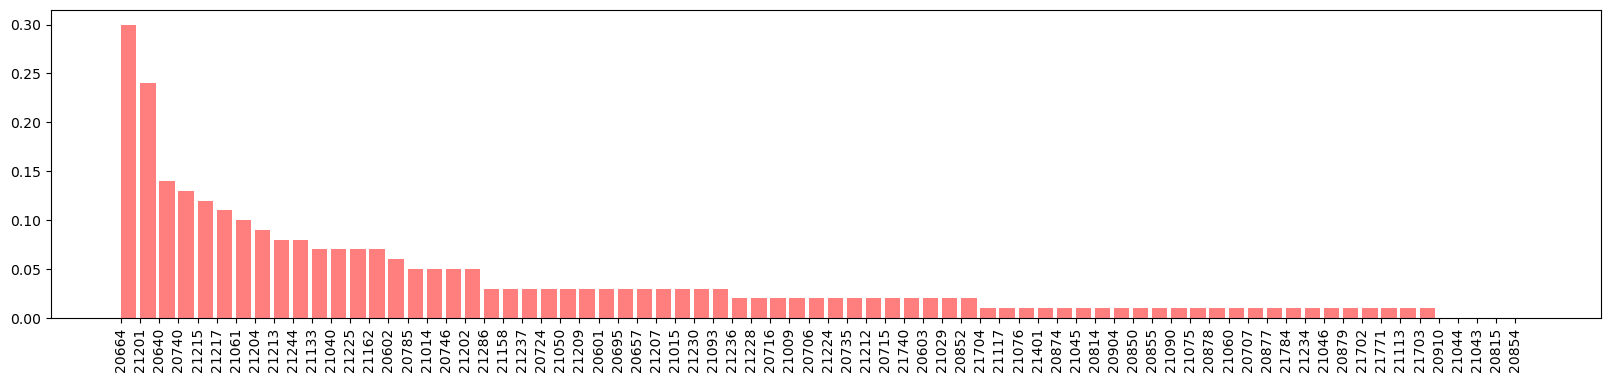

In [76]:
# Generate a bar plot showing the total number of EV per zipcode
import matplotlib.pyplot as plt
import numpy as np

ratio=sorted_merged_maryland_df["EV_to_charging_station_ratio"]
zipcode=sorted_merged_maryland_df["ZipCode"]

plt.figure(figsize=(20,4))
plt.bar(zipcode, ratio, color='r', alpha=0.5, align="edge")
plt.xticks(rotation="vertical")
plt.show()



<Axes: ylabel='Frequency'>

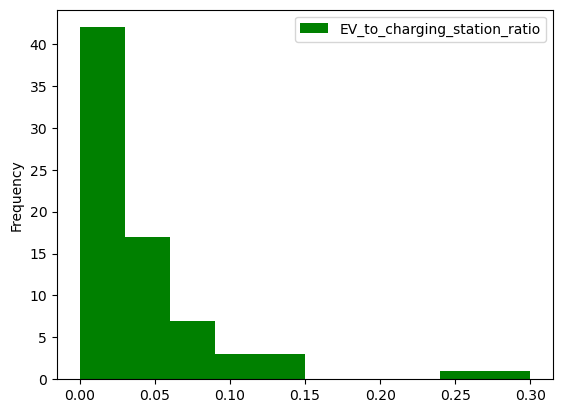

In [57]:
ratio=merged_maryland_df["EV_to_charging_station_ratio"]
zipcode=merged_maryland_df["ZipCode"]
merged_maryland_df.plot("ZipCode","EV_to_charging_station_ratio",kind="hist", color="green")

<Axes: xlabel='EV Count', ylabel='Charging Stations'>

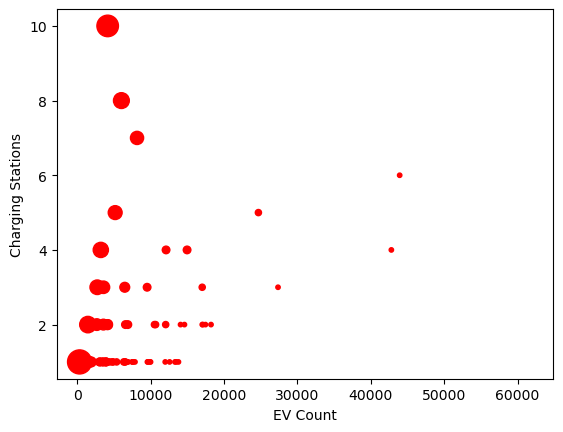

In [66]:
ratio=merged_maryland_df["EV_to_charging_station_ratio"]
charging_stations=merged_maryland_df["Charging Stations"]
count=merged_maryland_df["EV Count"]
merged_maryland_df.plot.scatter(x="EV Count", y="Charging Stations", s=ratio*1000, color="red", alpha=1)

In [67]:
merged_maryland_df.to_csv("./merged_maryland.csv",index=False)
